**1- Data understanding and exploration

2- Data cleaning, where necessary

3- Data preparation: Feature Engineering and Scaling

4- Feature Selection using RFE and Model Building

5- Linear Regression Assumptions Validation and Outlier Removal

6- Rebuilding the Model Post Outlier Removal: Feature Selection using K-Fold Cross Validation & RFE

7- Removing Multicollinearity, Model Re-evaluation and Assumptions Validation

MODEL DEVELOPMENT**

**Holistic Assessment of The Quality of Global HealthCare and ExpenditurePerCapita Notebook has following sections:**

***Lets develop an ideal model that will predict the Total ExpenditurePerCapita using the variables or features in order to implement the first phase of this project which is centred on assessing the quality of Public Health, with the second phase having to do with uncovering the most important variables accounting for the bulk of the money that makes up the government's Total ExpenditurePerCapita. This is just an estimate but should give us an objective idea of how much the car should cost.

We often use Model Development to help us predict future observations from the data we have.

A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.***

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('HealthCare_Data_Final.csv')
df

,Country,Year,key,Diagnostic_Exams,ExpenditurePerCapita,Hospitals,Life_Expectancy_at_Birth,PercPopulationabove65,Physicians,Private_Insurance,...,death_by_cancer,death_by_circular,death_by_accident,Mean_Schooling_Years,NationalIncome,hospital_employment,tot_equipment,medical_grads,nurse_grads,death_by_respirat
0,Australia,2010,Australia2010,118.1,3595.357,44.75,81.8,13.556,3.49,52.5,...,4.851952,4.012618,0.443542,12.6,39980.77299,14.46,129.88,12.08,67.57,0.914317
1,Australia,2011,Australia2011,116.7,3809.112,44.23,82.0,13.822,3.53,53.3,...,4.829091,3.949772,0.469158,12.7,47843.28688,14.53,131.00,13.48,71.64,0.950491
2,Australia,2012,Australia2012,131.8,3854.190,43.24,82.1,14.137,3.50,54.2,...,4.734266,3.706537,0.458680,12.8,52881.80560,14.56,133.00,13.98,71.68,0.981257
3,Australia,2013,Australia2013,139.4,4091.385,42.59,82.2,14.400,3.56,54.8,...,4.769588,3.568771,0.451214,12.2,52930.05827,14.93,135.00,15.45,74.81,0.943196
4,Australia,2014,Australia2014,152.9,4190.681,39.53,82.4,14.663,3.64,55.4,...,4.704680,3.605016,0.497117,12.3,48159.36038,16.63,132.00,15.31,75.84,1.026992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,United States,2011,United States2011,382.3,8154.364,14.80,78.7,13.272,2.60,60.6,...,4.826256,4.540751,0.736220,13.4,42551.14014,19.49,200.00,6.91,65.04,1.433168
230,United States,2012,United States2012,367.0,8423.311,14.58,78.8,13.743,2.63,60.3,...,4.841466,4.501021,0.742773,13.4,44822.16060,19.58,201.00,6.94,66.40,1.407375
231,United States,2013,United States2013,352.2,8628.561,14.42,78.8,14.124,2.70,60.1,...,4.824457,4.504545,0.755220,13.3,45734.87711,19.55,203.00,7.26,63.35,1.482025
232,United States,2014,United States2014,369.4,9042.281,14.15,78.9,14.501,2.71,61.6,...,4.840709,4.481012,0.782835,13.3,47837.56796,19.49,204.00,7.24,62.92,1.448998


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [4]:
df.info

<bound method DataFrame.info of            Country  Year                key  Diagnostic_Exams  \
0        Australia  2010      Australia2010             118.1   
1        Australia  2011      Australia2011             116.7   
2        Australia  2012      Australia2012             131.8   
3        Australia  2013      Australia2013             139.4   
4        Australia  2014      Australia2014             152.9   
..             ...   ...                ...               ...   
229  United States  2011  United States2011             382.3   
230  United States  2012  United States2012             367.0   
231  United States  2013  United States2013             352.2   
232  United States  2014  United States2014             369.4   
233  United States  2015  United States2015             368.2   

     ExpenditurePerCapita  Hospitals  Life_Expectancy_at_Birth  \
0                3595.357      44.75                      81.8   
1                3809.112      44.23                   

In [5]:
df.dtypes

Country                      object
Year                          int64
key                          object
Diagnostic_Exams            float64
ExpenditurePerCapita        float64
Hospitals                   float64
Life_Expectancy_at_Birth    float64
PercPopulationabove65       float64
Physicians                  float64
Private_Insurance           float64
Public_Insurance            float64
death_by_cancer             float64
death_by_circular           float64
death_by_accident           float64
Mean_Schooling_Years        float64
NationalIncome              float64
hospital_employment         float64
tot_equipment               float64
medical_grads               float64
nurse_grads                 float64
death_by_respirat           float64
dtype: object

In [6]:
df.corr()

,Year,Diagnostic_Exams,ExpenditurePerCapita,Hospitals,Life_Expectancy_at_Birth,PercPopulationabove65,Physicians,Private_Insurance,Public_Insurance,death_by_cancer,death_by_circular,death_by_accident,Mean_Schooling_Years,NationalIncome,hospital_employment,tot_equipment,medical_grads,nurse_grads,death_by_respirat
Year,1.000000,0.172840,0.101335,-0.038583,0.130140,0.124049,0.102254,0.026747,0.013608,0.032473,-0.029654,-0.028603,0.072556,0.011291,0.029382,0.033295,0.149963,0.061593,0.078233
Diagnostic_Exams,0.172840,1.000000,0.604633,0.194876,0.338663,0.190589,0.051227,0.334898,-0.272332,0.049562,-0.170020,-0.033050,0.242048,0.498776,0.406534,0.558132,-0.228496,0.275567,0.206813
ExpenditurePerCapita,0.101335,0.604633,1.000000,0.015130,0.608280,0.395716,0.086002,0.535701,-0.306298,0.256126,-0.211944,-0.007280,0.465017,0.844845,0.756766,0.599387,0.124714,0.503265,0.313498
Hospitals,-0.038583,0.194876,0.015130,1.000000,0.130582,0.238366,-0.106880,-0.013848,0.082670,0.095061,-0.021158,0.049500,0.181734,0.033677,0.108270,0.517022,-0.153828,0.257292,0.237146
Life_Expectancy_at_Birth,0.130140,0.338663,0.608280,0.130582,1.000000,0.422459,0.061914,0.518588,0.229653,0.220377,-0.453313,-0.429873,0.357449,0.671864,0.508138,0.443089,0.025771,0.409559,0.334970
PercPopulationabove65,0.124049,0.190589,0.395716,0.238366,0.422459,1.000000,0.139179,0.141860,0.121716,0.895998,0.483074,0.241766,0.406184,0.329094,0.479852,0.513845,0.264963,0.279376,0.493196
Physicians,0.102254,0.051227,0.086002,-0.106880,0.061914,0.139179,1.000000,-0.150851,0.056052,0.053280,0.124176,0.106061,0.008757,0.222642,0.189810,-0.087844,0.227977,-0.006120,-0.006209
Private_Insurance,0.026747,0.334898,0.535701,-0.013848,0.518588,0.141860,-0.150851,1.000000,0.004131,0.068053,-0.408505,-0.105366,0.348481,0.493287,0.330985,0.270817,-0.167955,0.313912,0.112405
Public_Insurance,0.013608,-0.272332,-0.306298,0.082670,0.229653,0.121716,0.056052,0.004131,1.000000,0.119266,-0.031528,-0.238115,-0.021987,0.062381,0.024661,-0.358176,0.238136,0.014769,-0.025096
death_by_cancer,0.032473,0.049562,0.256126,0.095061,0.220377,0.895998,0.053280,0.068053,0.119266,1.000000,0.633156,0.342829,0.443008,0.180017,0.363883,0.317334,0.368773,0.217738,0.420650


In [7]:
df_numeric=df.select_dtypes(include=['float64','int64'])
df_numeric.head()

,Year,Diagnostic_Exams,ExpenditurePerCapita,Hospitals,Life_Expectancy_at_Birth,PercPopulationabove65,Physicians,Private_Insurance,Public_Insurance,death_by_cancer,death_by_circular,death_by_accident,Mean_Schooling_Years,NationalIncome,hospital_employment,tot_equipment,medical_grads,nurse_grads,death_by_respirat
0,2010,118.1,3595.357,44.75,81.8,13.556,3.49,52.5,100.0,4.851952,4.012618,0.443542,12.6,39980.77299,14.46,129.88,12.08,67.57,0.914317
1,2011,116.7,3809.112,44.23,82.0,13.822,3.53,53.3,100.0,4.829091,3.949772,0.469158,12.7,47843.28688,14.53,131.00,13.48,71.64,0.950491
2,2012,131.8,3854.190,43.24,82.1,14.137,3.50,54.2,100.0,4.734266,3.706537,0.458680,12.8,52881.80560,14.56,133.00,13.98,71.68,0.981257
3,2013,139.4,4091.385,42.59,82.2,14.400,3.56,54.8,100.0,4.769588,3.568771,0.451214,12.2,52930.05827,14.93,135.00,15.45,74.81,0.943196
4,2014,152.9,4190.681,39.53,82.4,14.663,3.64,55.4,100.0,4.704680,3.605016,0.497117,12.3,48159.36038,16.63,132.00,15.31,75.84,1.026992


<AxesSubplot:>

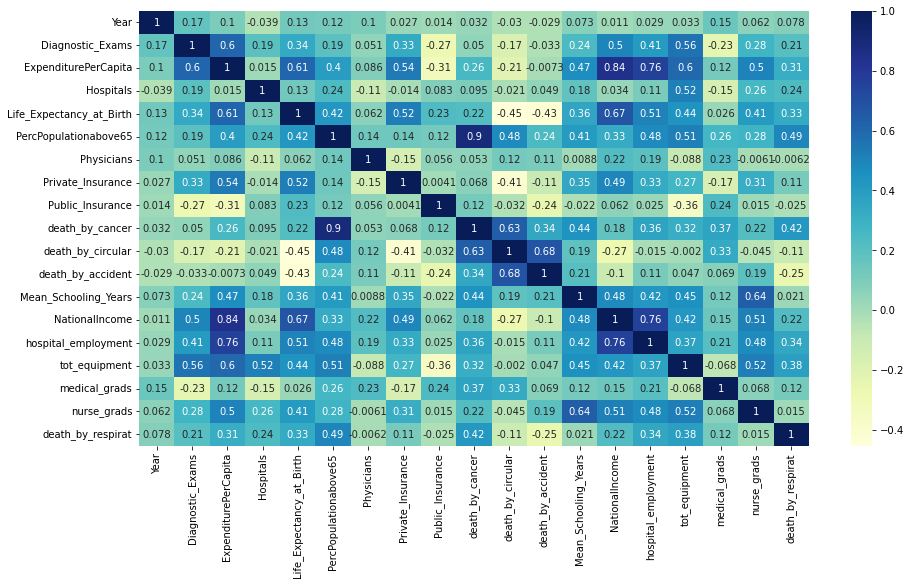

In [8]:
corr=df_numeric.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu")


**Interpretation: A careful examination of correlation between variables informs our knowledge
    that we don't observe a significant correlation level between variables under consideration 
    as the 0.8 threshold for meeting this condition is lacking from the result of our
    correlation plot. We therefore conclude that there is no evidence suggesting 
    Multicollinearity between dependent variables available in our datasets.
    We observe a case of perfect correlation
    between the two variables named, Year and Death_by_respiratory_diseases.**

***Let's examine our independent variables as well as dependent variable for measuring the quality of public health for this project variables enlisted below:

1.Private_Insurance

2.Public_Insurance

3.Hospitals

4.Diagnostic_Exams

5. PercPopulationabove65

6.hospital_employment

7.tot_equipment



Dependent Varaiable: Expenditure_per_Capita***

In [9]:
df.dtypes

Country                      object
Year                          int64
key                          object
Diagnostic_Exams            float64
ExpenditurePerCapita        float64
Hospitals                   float64
Life_Expectancy_at_Birth    float64
PercPopulationabove65       float64
Physicians                  float64
Private_Insurance           float64
Public_Insurance            float64
death_by_cancer             float64
death_by_circular           float64
death_by_accident           float64
Mean_Schooling_Years        float64
NationalIncome              float64
hospital_employment         float64
tot_equipment               float64
medical_grads               float64
nurse_grads                 float64
death_by_respirat           float64
dtype: object

<AxesSubplot:xlabel='Private_Insurance', ylabel='ExpenditurePerCapita'>

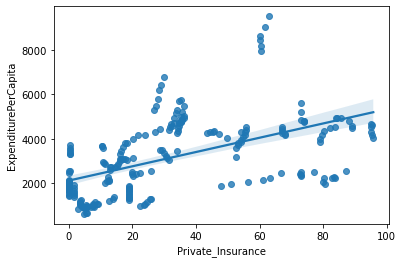

In [10]:
sns.regplot(x="Private_Insurance", y="ExpenditurePerCapita", data=df)

**We observe a case of weak positive correlation between ExpenditurePerCapita and PrivateInsurance**

<AxesSubplot:xlabel='Public_Insurance', ylabel='ExpenditurePerCapita'>

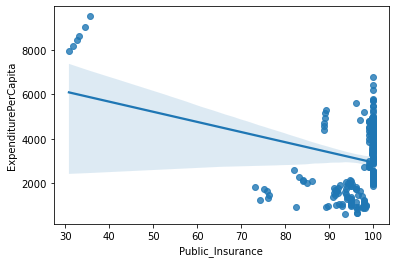

In [11]:
sns.regplot(x="Public_Insurance", y="ExpenditurePerCapita", data=df)

**We observe a case of strong negative correlation between Private_Insurance and ExpenditurePerCapita**

In [12]:
df[['Private_Insurance','ExpenditurePerCapita']].corr()

,Private_Insurance,ExpenditurePerCapita
Private_Insurance,1.000000,0.535701
ExpenditurePerCapita,0.535701,1.000000


In [13]:
df[['Private_Insurance','ExpenditurePerCapita']].corr()

,Private_Insurance,ExpenditurePerCapita
Private_Insurance,1.000000,0.535701
ExpenditurePerCapita,0.535701,1.000000


<AxesSubplot:xlabel='hospital_employment', ylabel='ExpenditurePerCapita'>

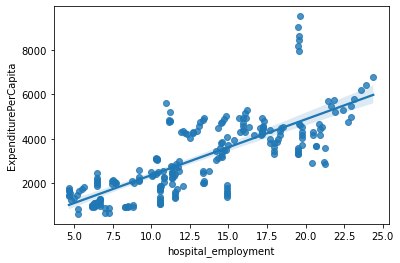

In [14]:
sns.regplot(x="hospital_employment", y="ExpenditurePerCapita", data=df)

**We observe a  case of highly correlated positive relationship between the hospital_employment and ExpenditurePerCapita in line with the threshold for 
maesuring Pearson Correlation Coefficient, a case of high correlation should fall between the range of 0.7 to 0.9**

In [15]:
df[['hospital_employment','ExpenditurePerCapita']].corr()

,hospital_employment,ExpenditurePerCapita
hospital_employment,1.000000,0.756766
ExpenditurePerCapita,0.756766,1.000000


**We observe a case of weak positive relationship between ExpenditurePerCapita and Hospital_employment**

<AxesSubplot:xlabel='tot_equipment', ylabel='ExpenditurePerCapita'>

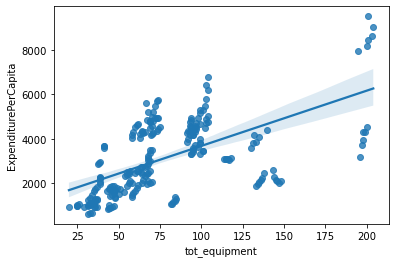

In [16]:
sns.regplot(x="tot_equipment", y="ExpenditurePerCapita", data=df)

**There exists a moderate positive correlation between the two in line with the threshold for measuring Pearson Correlation
Coefficients, a moderate positive correlation shoulld fall between the range of 0.5 to 0.7**

In [17]:
df[['tot_equipment','ExpenditurePerCapita']].corr()

,tot_equipment,ExpenditurePerCapita
tot_equipment,1.000000,0.599387
ExpenditurePerCapita,0.599387,1.000000


**We observe a case of weak positive relationship between ExpenditurePerCapita and Total_equipment**

<AxesSubplot:xlabel='Hospitals', ylabel='ExpenditurePerCapita'>

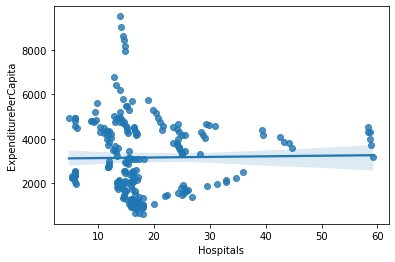

In [18]:
sns.regplot(x="Hospitals", y="ExpenditurePerCapita", data=df)

In [19]:
df[['Private_Insurance','ExpenditurePerCapita']].corr()

,Private_Insurance,ExpenditurePerCapita
Private_Insurance,1.000000,0.535701
ExpenditurePerCapita,0.535701,1.000000


<AxesSubplot:xlabel='Public_Insurance', ylabel='ExpenditurePerCapita'>

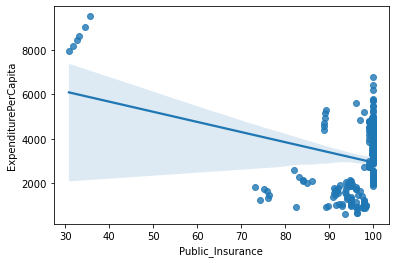

In [20]:
sns.regplot(x="Public_Insurance", y="ExpenditurePerCapita", data=df)

**We observe a case of low correlation between Public_Insurance and ExpenditurePerCapita in line with the threshold for measuring 
low correlation following Pearson Correlation Coefficients standard **

In [21]:
df[['Public_Insurance','ExpenditurePerCapita']].corr()

,Public_Insurance,ExpenditurePerCapita
Public_Insurance,1.000000,-0.306298
ExpenditurePerCapita,-0.306298,1.000000


**There exists a strong negative relationship between PublicInsurance and ExpenditurePerCapita**

<AxesSubplot:xlabel='hospital_employment', ylabel='ExpenditurePerCapita'>

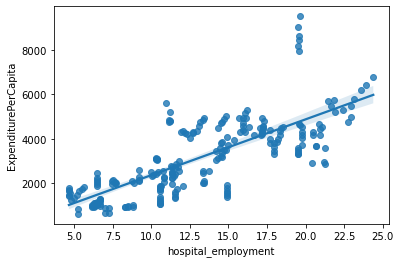

In [22]:
sns.regplot(x="hospital_employment", y="ExpenditurePerCapita", data=df)

<AxesSubplot:xlabel='Hospitals', ylabel='ExpenditurePerCapita'>

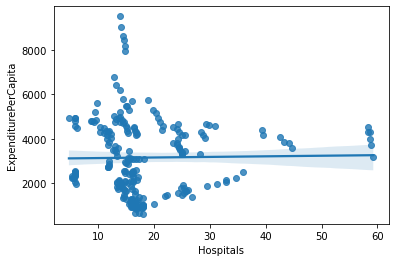

In [23]:
sns.regplot(x="Hospitals", y="ExpenditurePerCapita", data=df)

In [24]:
df[['Hospitals','ExpenditurePerCapita']].corr()

,Hospitals,ExpenditurePerCapita
Hospitals,1.00000,0.01513
ExpenditurePerCapita,0.01513,1.00000


In [25]:
df.dtypes

Country                      object
Year                          int64
key                          object
Diagnostic_Exams            float64
ExpenditurePerCapita        float64
Hospitals                   float64
Life_Expectancy_at_Birth    float64
PercPopulationabove65       float64
Physicians                  float64
Private_Insurance           float64
Public_Insurance            float64
death_by_cancer             float64
death_by_circular           float64
death_by_accident           float64
Mean_Schooling_Years        float64
NationalIncome              float64
hospital_employment         float64
tot_equipment               float64
medical_grads               float64
nurse_grads                 float64
death_by_respirat           float64
dtype: object

In [26]:
#X=df.drop(columns=["PercPopulationabove65 ","Year", 'key', 'Physicians', 'Country', 'NationalIncome', 'death_by_circular','Mean_Schooling_Years', 'death_by_accident', 'nurse_grads', 'death_by_respirat', 'death_by_respirat', 'nurse_grads', 'death_by_circular',])
#y=df["ExpenditurePerCapita"]

In [13]:
X=df.drop(columns=[ "ExpenditurePerCapita", "Year", 'key', 'Physicians', 'Country', 'NationalIncome', 'Mean_Schooling_Years', 'death_by_accident',  'death_by_respirat', 'nurse_grads', 'death_by_circular',])
y=df["ExpenditurePerCapita"]

In [17]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [18]:
# Model with all features
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [21]:
## Evaluation metrics

#Rsqaure
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.8794470721029711
R-sqaure on test data: 0.8909704462180035
RMSE on train data: 560.9031565911253
RMSE on test data: 607.8206580821056


In [22]:
# Model with all features
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [25]:
# Model with all features
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [26]:
# Model with all features
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [27]:
#scaling features though not necessary in MLR but its good to do it as it makes interpretation of regression coefficients easier

from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols=X.columns
X=pd.DataFrame(scale(X))
X.columns=cols
X.columns

Index(['Diagnostic_Exams', 'Hospitals', 'Life_Expectancy_at_Birth',
       'PercPopulationabove65', 'Private_Insurance', 'Public_Insurance',
       'death_by_cancer', 'hospital_employment', 'tot_equipment',
       'medical_grads'],
      dtype='object')

In [29]:
# Model with all features
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [31]:
## Evaluation metrics

#Rsqaure
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.8794470721029711
R-sqaure on test data: 0.8909704462180035
RMSE on train data: 560.9031565911253
RMSE on test data: 607.8206580821056


In [35]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)
    


In [38]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)
    


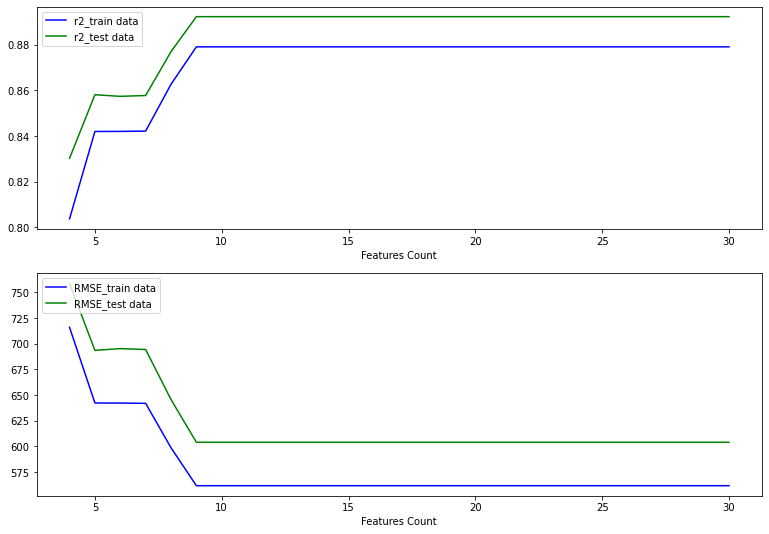

In [39]:
# plotting r2 and RMSE against n_features
fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')
ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.show()

In [37]:
col=X_train.columns#obtaining fetaure names of 13 most imp 

#making new Df's with  13 most imp features as per RFE algorithm
X_train_13= X_train[col]
X_test_13 = X_test[col]


# add a constant to the model
X_train_13 = sm.add_constant(X_train_13,has_constant='add')
X_test_13 = sm.add_constant(X_test_13,has_constant='add')


#fit OLS model
lm_sm=sm.OLS(y_train,X_train_13).fit()


#making predictions
y_pred_train=lm_sm.predict(X_train_13)
y_pred_test=lm_sm.predict(X_test_13)


#evlaution metrics

#R-sqaure
train_r2=lm_sm.rsquared
test_r2=r2_score(y_pred_test, y_test)

#RMSE/stan. error
error_test=y_pred_test-y_test
error_train=y_pred_train-y_train
    
test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)

print('----------------------R-sqaure-------------------------------------------')
print("R-sq for test data is {}".format(test_r2))
print("R-sq for train data is {}".format(train_r2))


print('----------------------STANDARD ERROR/RMSE-------------------------------------------')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))

print(lm_sm.summary())


----------------------R-sqaure-------------------------------------------
R-sq for test data is 0.876623657172341
R-sq for train data is 0.879447072102971
----------------------STANDARD ERROR/RMSE-------------------------------------------
RMSE for test data is 607.8206580821069
RMSE for train data is 560.9031565911254
                             OLS Regression Results                             
Dep. Variable:     ExpenditurePerCapita   R-squared:                       0.879
Model:                              OLS   Adj. R-squared:                  0.872
Method:                   Least Squares   F-statistic:                     110.9
Date:                  Wed, 27 Jul 2022   Prob (F-statistic):           1.41e-64
Time:                          18:46:05   Log-Likelihood:                -1263.0
No. Observations:                   163   AIC:                             2548.
Df Residuals:                       152   BIC:                             2582.
Df Model:                      

In [41]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)
    


Text(0.5, 0, 'Index')

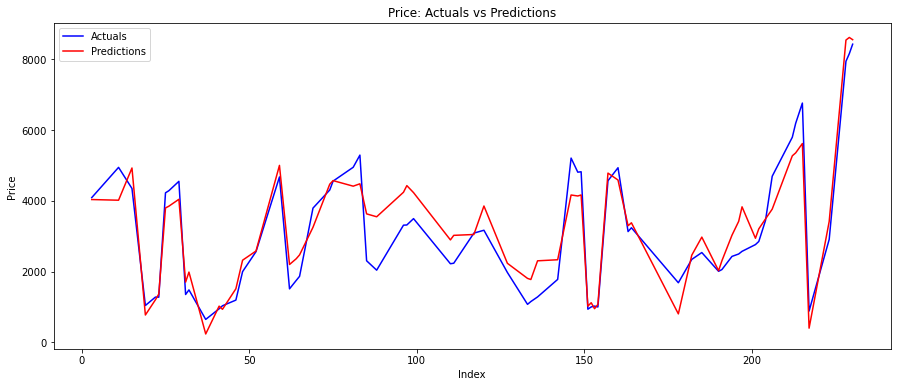

In [43]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred_test,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

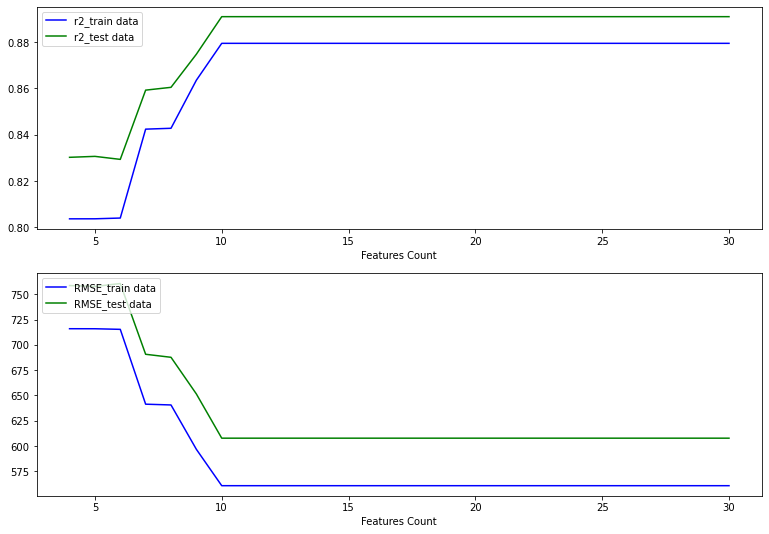

In [45]:
# plotting r2 and RMSE against n_features
fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')
ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.show()

Jarque-Bera test ---- statistic: 0.4931, p-value: 0.7814933295202489
Shapiro-Wilk test ---- statistic: 0.9932, p-value: 0.6476
Kolmogorov-Smirnov test ---- statistic: 0.5031, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.3807, 5% critical value: 0.7690
If the returned Anderson Draling statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


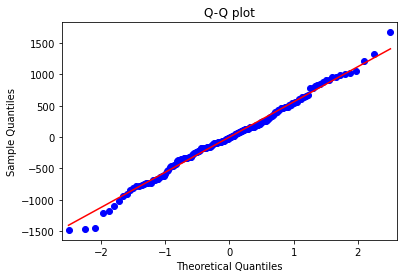

In [45]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');
    

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned Anderson Draling statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lm_sm)

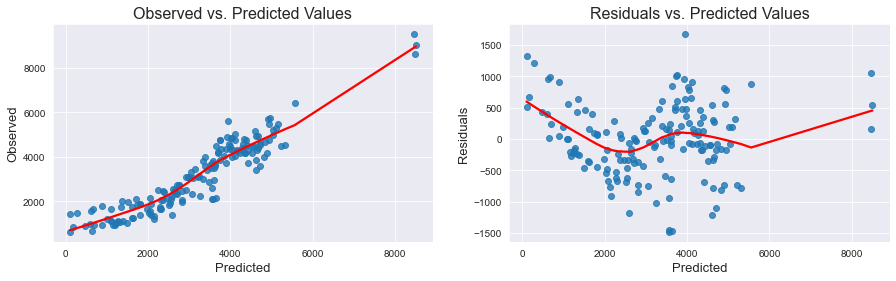

In [46]:
#To detect linearity lets inspect plots of observed vs. predicted values or residuals vs. predicted values. 
#The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot & 
#around horizontal line in the latter one

def linearity_test(model, y):
    
    fitted_vals = model.predict()
    residuals = model.resid
    
    sns.set_style('darkgrid')
    fig,ax=plt.subplots(1,2, figsize=(15,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Observed', fontsize=13)
    
    sns.regplot(x=fitted_vals,y=residuals,lowess=True,ax=ax[1],line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Residuals', fontsize=13)
    
linearity_test(lm_sm, y_train)

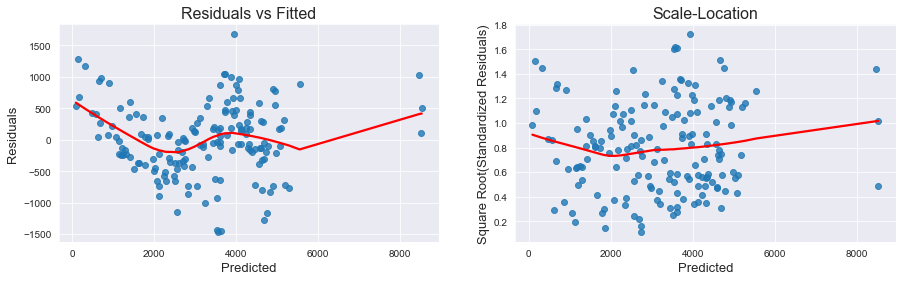

In [46]:

 
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    residuals = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
    
    sns.set_style('darkgrid')
    
    
    fig, ax = plt.subplots(1,2,figsize=(15,4))

    sns.regplot(x=fitted_vals, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Residuals', fontsize=13)

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Square Root(Standardized Residuals)', fontsize=13)

      
homoscedasticity_test(lm_sm)

***Implication of Our Findings From The Regression Analysis and Its Impact Using Our Knowledge of Predictive Analytics:

With increase in 10 percentage of population under private_insurance coverage, ExpenditurediturePerCapita is 
associated with an increase of 11.76 percent


With increase in Hospitals by 1 per 1000 persons,

ExpenditurePerCapita is associated with a decrease of 21percent


With increase in 1 percentage of population under public_insurance coverage, 

ExpenditurePerCapita is associated with a decrease of 47 percent
With increase in 1 Employee in Health sector by 1000 of population under private_insurance coverage, 

ExpenditurePerCapita is associated with an increase by 139 percent
With increase in 10 percentage of population under private_insurance coverage, 

ExpenditurePerCapita is associated with an increase of 11.45 percent
With an increase in 10 equipment per 1000, 

ExpenditurePerCapita is associated with an increase of 7.8 percent ***